# Lecture 8. Overview of the clustering methods

## Problem statement

- Given set of samples $x_i$
- Split them into groups in a way that similar objects were in the similar groups or clusters
- Applictions: documents, pictures, etc.

## What is cluster?

- Very informal concept
- Maximize internal homogenious
- Maximize external dissimilarity

## Hierarchical clustering

- Agglomerative (bottom up)
    - Initilization: each point is a cluster
    - Every iteration is combine some two clusters into 
- Divisive (top down)
    - Initialization: all samples are the single cluster
    - In every iteration some cluster is splitted
<img src="./fig/hierarchical.png">

## Key steps

- How to measure the distance between clusters?
- How to choose what cluster to split/merge?

## Distances

- Nearest neighbour distance
$$
d_{(ij)k} = \min_{x \in C_i \cup C_j, y \in C_k} \rho(x, y)
$$ 
- Distant neighbour distance
$$
d_{(ij)k} = \max_{x \in C_i \cup C_j, y \in C_k} \rho(x, y) 
$$
- Group average distance
$$
d_{(ij)k} = \frac{1}{|C_i \cup C_j|}\frac{1}{|C_k|} \sum_{x \in C_i \cup C_j}\sum_{y \in C_k} \rho(x, y)
$$
- Lance-Williams formula generalizes all above approaches

$$
d_{(ij)k} = \alpha_i d_{ik} + \alpha_j d_{jk} + \beta d_{ij} +  \gamma |d_{ik} - d_{jk}|
$$

## $k$-means

- Given number of clusters $K$ and samples $x_i$
- Randomly initialize $K$ centroids
- Assign each sample the cluster of the nearest centroid
- Update centroid as average of the samples from the same cluster
- Repeat intill convergence

## Assumptions

- Known number of clusters
- Spherical form of clusters
- Clusters of approximately same size and density

## Assignment property

- Hard assignment
- Good for samples near centroids
- Bad for boundary samples
- What are alternatives?

## Soft assignment

- Each sample assigns to each cluster with some probability
- We can introduce the distribution of data and the likelihood of the model
- Statistics and probability theory help us here!

## Mixture models

- We have $K$ clusters
- Attribute of any sample:
    - $x_i$ - observed features
    - $z_i$ - unknown cluster label
- Introduce distribution of the $z_i$: $\pi_k = P(z_i = k)$
- Introduce conditional distribution $P(x_i |z_i = k)$
- Distribution of data 
$$
p(x) = \sum_{k = 1}^K p(x|z = k) p(z=k)
$$
- If $p(x|z=k) = \mathcal{N}(x| \mu_k , \Sigma_k)$ are gaussian then it's called Gaussian Mixture Model

## Expectation Maximization algorithm

**The main idea is to maximize likelihod of the model**

- Initialize $\mu_k$, $\Sigma_k$ and $\pi_k$for all $k = 1,\dots, K$
- Repeat until convergence
    - expectation: estimate hidden variables 
    $$
    r_{nk} = p(z=k|x_n) = \frac{p(x_n|z=k)p(z=k)}{p(x_n)}
    $$
    - maximization: update $\pi_k$, $\mu_k$, $\Sigma_k$ as unbiased estimation based on the hidden variables:
    $$ N_k = \sum_{i} r_{ik}, \; \pi_k = \frac{N_k}{N}, \; \mu_k = \frac{1}{N_k} \sum_{n=1}^N r_{nk}x_n, \; \Sigma_k = \frac{1}{N_k} \sum_n r_{nk} (x_n - \mu_k) (x_n - \mu_k)^{\top}$$

## EM algorithm illustration

<img src="./fig/emexp.png", width=800>

## Analysis

- Repeat untill the difference in hidden variables is sufficiently small
- Can stuck in local minimum, use multistarts
- $k$-means is a particular case of EM-algorithm. How reduce EM to $k$-means?
- It has many modification like stochastic, on-line, 

In [10]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

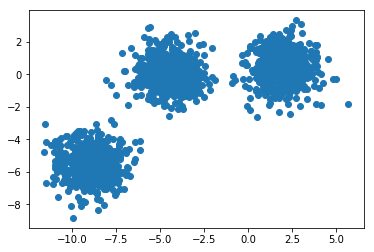

In [4]:
# Generate data
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1])

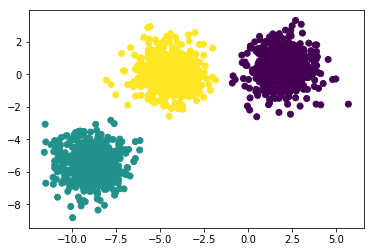

In [6]:
# Clustering of blobs
kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

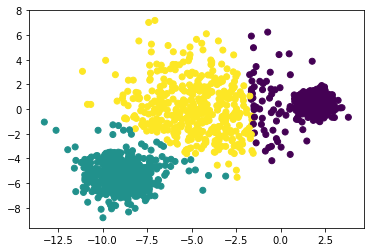

In [8]:
# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

kmeans = KMeans(n_clusters=3, random_state=random_state)
y_pred = kmeans.fit_predict(X_varied)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)

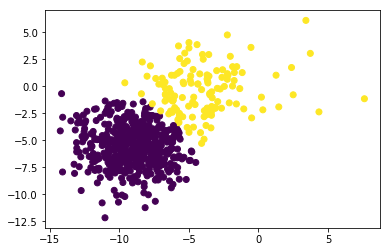

In [11]:
# Unevenly sized blobs
X, y = make_blobs(n_samples=n_samples,
                  cluster_std=[2.0, 2.0, 2.0],
                  random_state=random_state)
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
kmeans = KMeans(n_clusters=2, random_state=random_state)
y_pred = kmeans.fit_predict(X_filtered)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)

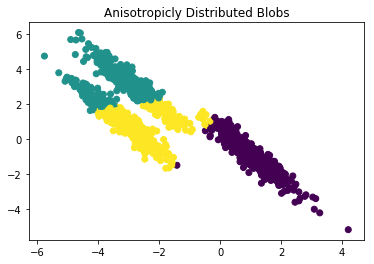

In [12]:
# Anisotropicly distributed data
X, y = make_blobs(n_samples=n_samples,
                  cluster_std=[1.0, 1.0, 1.0],
                  random_state=random_state)

transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3, random_state=random_state)

y_pred = kmeans.fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

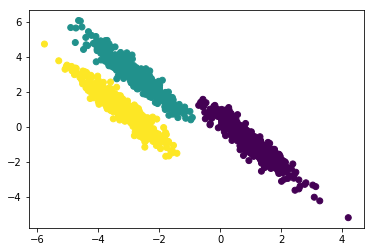

In [18]:
# GMM for anysotropic clusters
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=3, covariance_type='full', random_state=random_state)
gmm.fit(X_aniso)
y_pred = gmm.predict(X_aniso)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)